In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [201]:
data1 = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/AI-class-main/AI-class-main/titanic.csv')

In [202]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [203]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [205]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [206]:
#Age 결측치를 중앙값으로 채우기
data1['Age'].fillna(data1['Age'].median(), inplace = True)
#처리하기 어려운 데이터인 Cabin값 삭제
data1.drop('Cabin', axis=1, inplace=True)
#결측치를 최빈값으로 채우기
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace = True)

In [207]:
data1['Sex'] = data1['Sex'].map({'female':1, 'male':0})

In [208]:
data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [209]:
a=data1.drop('Survived',axis=1)
a.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [210]:
b=data1['Survived']
b.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [211]:
data = pd.concat([a, b], axis=1)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,1


In [212]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass')

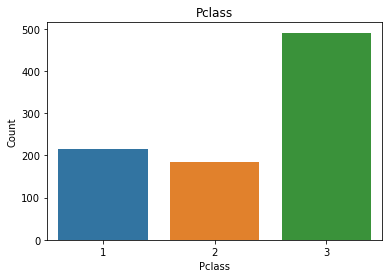

In [213]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass")

In [214]:
# 2. 생존자와 사망자 총 숫자 및 차트표시
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

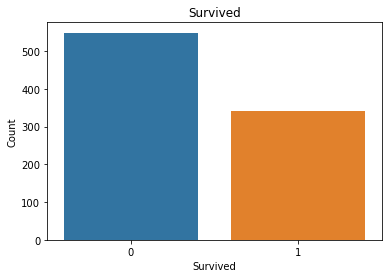

In [215]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived")

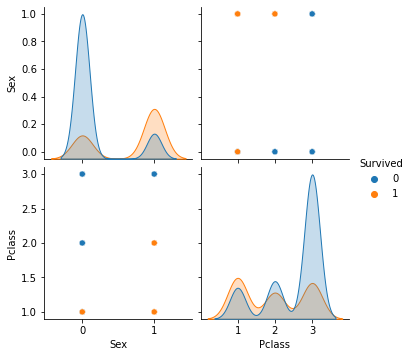

In [216]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
sns.pairplot(data,
             vars=['Sex','Pclass'],
            hue ='Survived')
plt.show()

In [217]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행


In [243]:
#Set x and y values
y=data.Survived.values
x_df4=data.drop(['Survived'],axis=1)
x_df3=x_df4.drop('Name',axis=1)
x_df2=x_df3.drop('Ticket',axis=1)
x_df1=x_df2.drop('PassengerId',axis=1)
x_df=x_df1.drop('Embarked',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [244]:
# train/test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [245]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('lr accuracy :', lr.score(x_test,y_test))

# confusion matrix
y_pred = lr.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)
print(cm_lr)

lr accuracy : 0.7541899441340782
[[88 19]
 [25 47]]


In [246]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('knn accuracy :',knn.score(x_test,y_test))
# confisioun matrix
y_pred = knn.predict(x_test)
y_true = y_test

# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)
print(cm_knn)

knn accuracy : 0.7877094972067039
[[88 19]
 [19 53]]


In [247]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print('svm accuracy :', svm.score(x_test,y_test))

# confisuon matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)
print(cm_svm)

svm accuracy : 0.770949720670391
[[93 14]
 [27 45]]


In [254]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('dt.accuracy : ', dt.score(x_test,y_test))

# confisuon matrix
y_pred = dt.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)
print(cm_dt)

dt.accuracy :  0.7653631284916201
[[87 20]
 [22 50]]


In [255]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('rf accuracy : ', rf.score(x_test,y_test))

# confision matrix
y_pred = rf.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)
print(cm_rf)

rf accuracy :  0.8100558659217877
[[92 15]
 [19 53]]


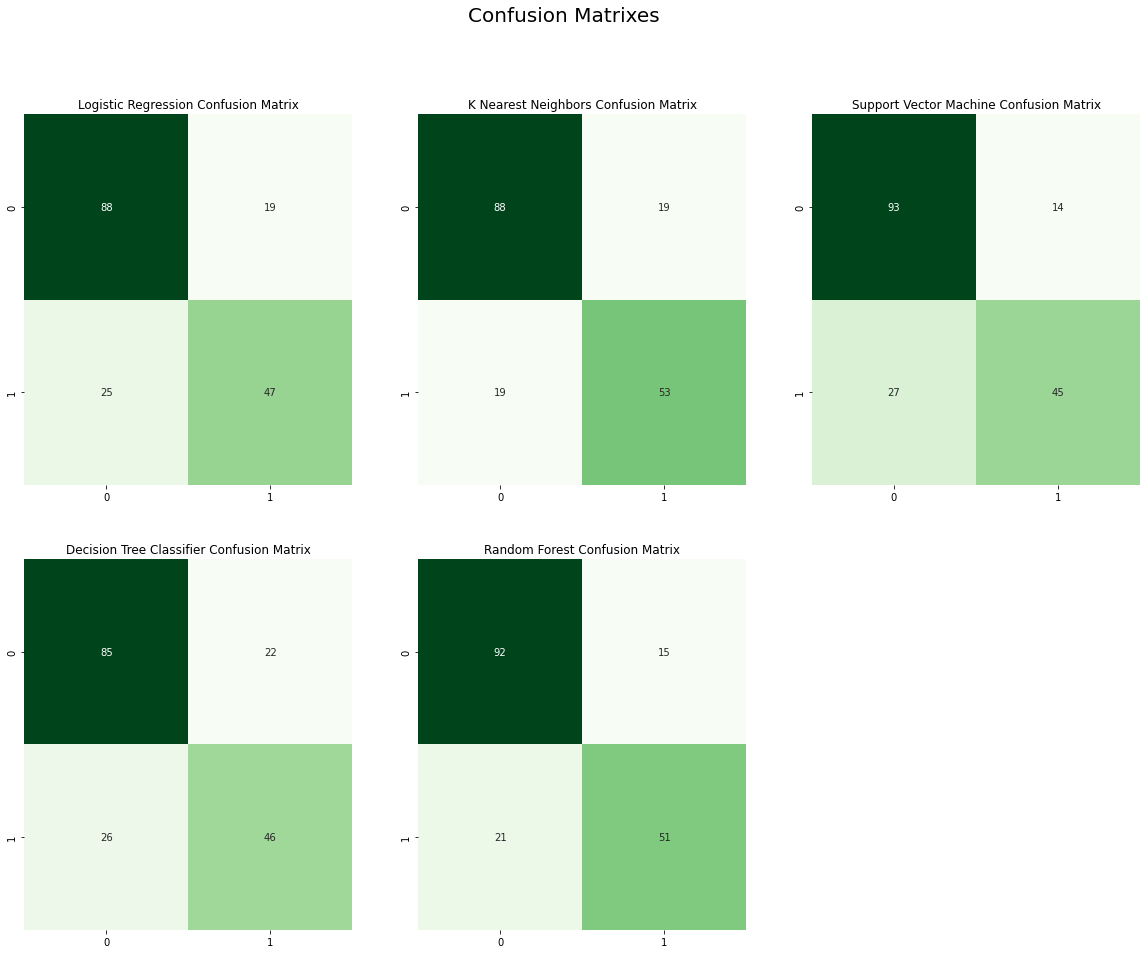

In [226]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()

In [ ]:
# 결측치 제거

In [ ]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행